# Final Project Lab Based Education KCV 2024
## _Unsupervised Learning_

![logo-kcv](img/kcv-profile.png)

### **Dataset**
Dataset yang digunakan pada analisis kali ini adalah **Data Stunting di Indonesia**.

<img src="https://img.okezone.com/content/2021/05/04/481/2405403/waduh-kasus-stunting-indonesia-nomor-4-tertinggi-di-dunia-kreAnza4Rw.jpg" alt="title" width="auto" height="auto">

**Stunting** merupakan masalah tumbuh kembang yang terjadi pada anak-anak akibat malnutrisi, infeksi berulang, dsb. 
Biasanya stunting ditandai oleh keterlambatan perutumbuhan yang menyimpang dari standard normal.
Masalah stunting membutuhkan perhatian secepatnya karena berdampak signifikan terhadap kemajuan suatu negara dalam berbagai bidang.

Oleh karena itu, analisis terhadap hasil clustering data stunting di Indonesia diperlukan untuk mengambil kebijakan dan mengetahui daerah/provinsi mana yang membutuhkan penanggulangan sesegera mungkin.


### **K-Means Clustering**

Algoritma yang digunakan dalam analisis ini adalah **K-Means Clustering**.

K-Means Clustering digunakan dalam analisis ini karena K-Means dapat mengidentifikasi pola data stunting dari tahun ke tahun dan mengelompokkan provinsi-provinsi dengan pola data yang sesuai dengan alur yang lebih sederhana dan cepat.

K-Means clustering adalah algoritma yang mengelompokkan **N data** (berdasarkan fitur / atribut) ke dalam **K cluster**. Sebuah cluster di K-Means berpusat pada sebuah **titik centroid**. Selain K-Means, ada juga K-Medians dan [K-Medoids](https://esairina.medium.com/clustering-menggunakan-algoritma-k-medoids-67179a333723).

<img src="https://editor.analyticsvidhya.com/uploads/56854k%20means%20clustering.png" alt="title" width="auto" height="auto">

In [48]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# Load data
df = pd.read_csv('./DataStuntingIndonesia.csv', delimiter = ';')

# Remove the 5th column
df = df.drop(columns=['Unnamed: 5'])

df

,Provinsi,2020,2021,2022,2023
0,ACEH,"13,4","12,1","8,0","7,5"
1,SUMATERA UTARA,"6,8","6,7","5,5","4,5"
2,SUMATERA BARAT,"17,5","15,1","10,3","8,8"
3,RIAU,"7,7","6,0","4,2","3,0"
4,JAMBI,"7,6","3,0","4,1","3,7"
5,SUMATERA SELATAN,"2,3","4,4","3,1","1,8"
6,BENGKULU,"8,3","6,3","4,8","4,5"
7,LAMPUNG,"5,3","6,1","4,5","3,9"
8,KEPULAUAN BANGKA BELITUNG,"3,3","5,9","3,9","3,2"
9,KEPULAUAN RIAU,"9,2","7,6","4,9","3,8"


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Provinsi  38 non-null     object
 1   2020      38 non-null     object
 2   2021      38 non-null     object
 3   2022      38 non-null     object
 4   2023      38 non-null     object
dtypes: object(5)
memory usage: 1.6+ KB


In [38]:
df.describe()

,Provinsi,2020,2021,2022,2023
count,38,38,38,38,38
unique,38,34,34,36,33
top,ACEH,"8,3","6,7","2,3","5,2"
freq,1,2,2,2,2


In [39]:
# Convert comma-separated decimals to periods and then to float
for year in ['2020', '2021', '2022', '2023']:
    df[year] = df[year].astype(str).str.replace(',', '.').astype(float)

# Select features for clustering
X = df[['2020', '2021', '2022', '2023']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

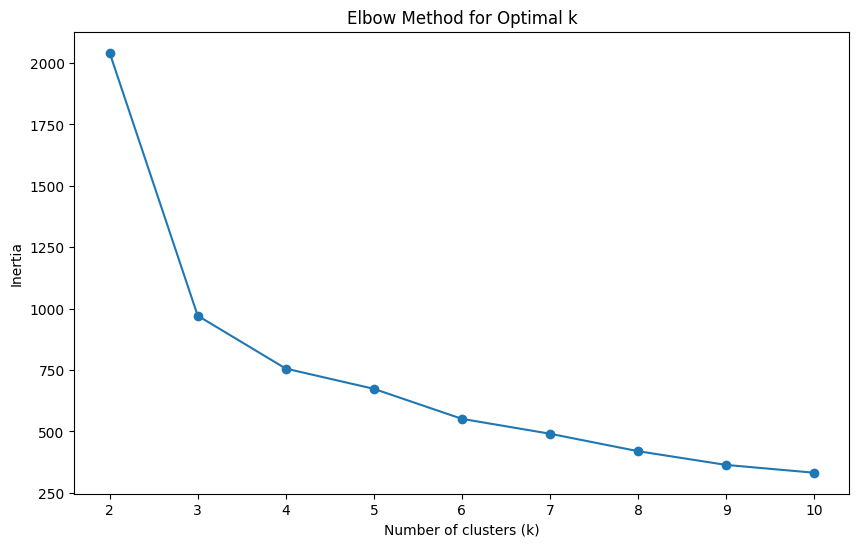

In [40]:
# 2. Choose the number of clusters (Elbow method)
inertias = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

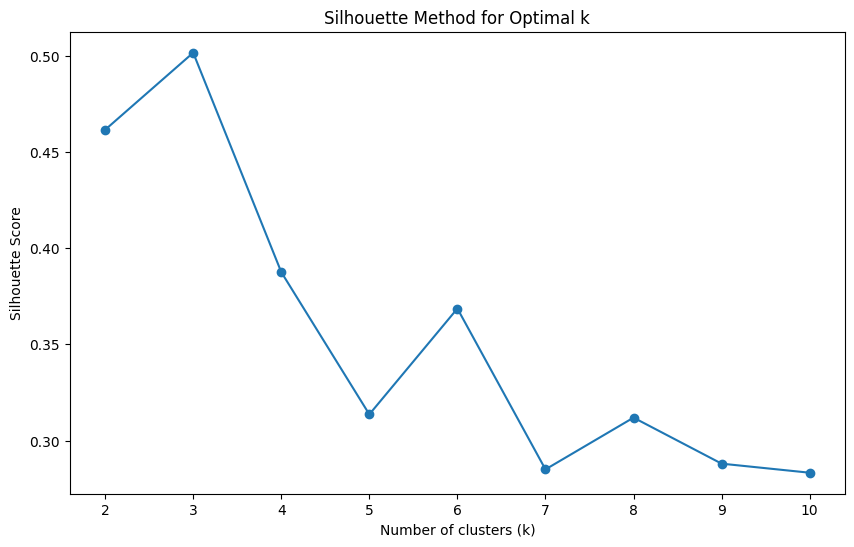

In [41]:
# Next Calculate silhouette scores for different values of k
from sklearn.metrics import silhouette_score
silhouette_scores = []
for k in range(2, 11):  # Start from 2 clusters, as silhouette score is undefined for k=1
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.show()

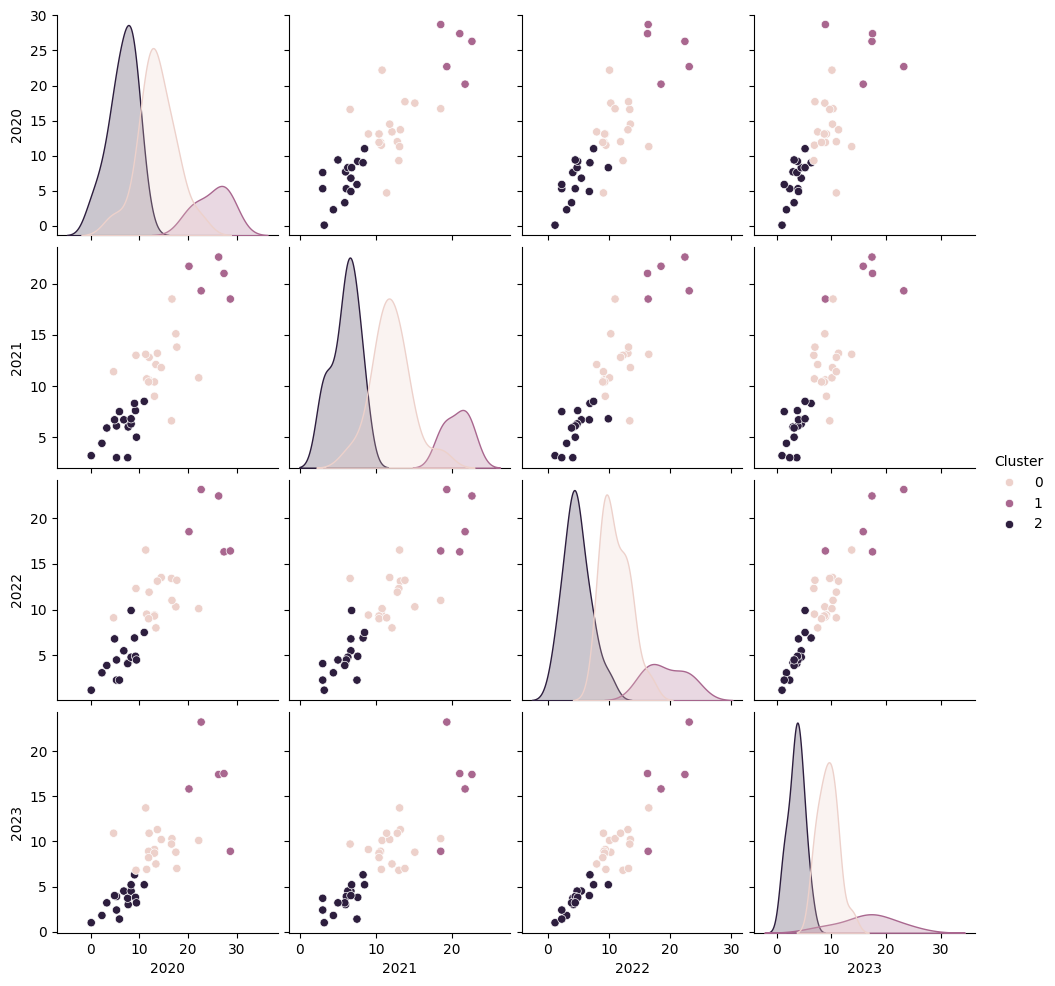

In [46]:
# 3. Apply k-means clustering
# Let's say we choose k=3 based on the elbow curve
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X)

# Pairplot after clustering
sns.pairplot(df, hue='Cluster', vars=['2020', '2021', '2022', '2023'])
plt.show()


In [47]:
# 4. Analyze the results
for cluster in df['Cluster'].unique():
    print(f"\nCluster {cluster}:")
    cluster_data = df[df['Cluster'] == cluster]
    print(cluster_data[['Provinsi', '2020', '2021', '2022', '2023']])
    print("\nMean values:")
    print(cluster_data[['2020', '2021', '2022', '2023']].mean())
    print("-" * 50)


Cluster 0:
              Provinsi  2020  2021  2022  2023
0                 ACEH  13.4  12.1   8.0   7.5
2       SUMATERA BARAT  17.5  15.1  10.3   8.8
12         JAWA TENGAH  13.1   9.0   9.4   9.1
13       DI YOGYAKARTA  11.9  10.6   9.2   8.9
14          JAWA TIMUR  11.5  10.7   9.5   6.9
20   KALIMANTAN TENGAH  22.2  10.8  10.1  10.1
21  KALIMANTAN SELATAN  13.1  10.4   9.3   8.7
22    KALIMANTAN TIMUR  14.5  11.8  13.5  10.2
25     SULAWESI TENGAH  13.7  13.2  13.1  11.3
26    SULAWESI SELATAN  11.9  10.4   9.0   8.2
27   SULAWESI TENGGARA  16.7  18.5  11.0  10.3
31        MALUKU UTARA   9.3  13.0  12.3   6.8
32         PAPUA BARAT  12.0  12.8  11.9  10.9
33               PAPUA   4.7  11.4   9.1  10.9
35       PAPUA SELATAN  11.3  13.1  16.5  13.7
36        PAPUA TENGAH  16.6   6.6  13.4   9.7
37    PAPUA BARAT DAYA  17.7  13.8  13.2   7.0

Mean values:
2020    13.594118
2021    11.958824
2022    11.105882
2023     9.352941
dtype: float64
-----------------------------------------

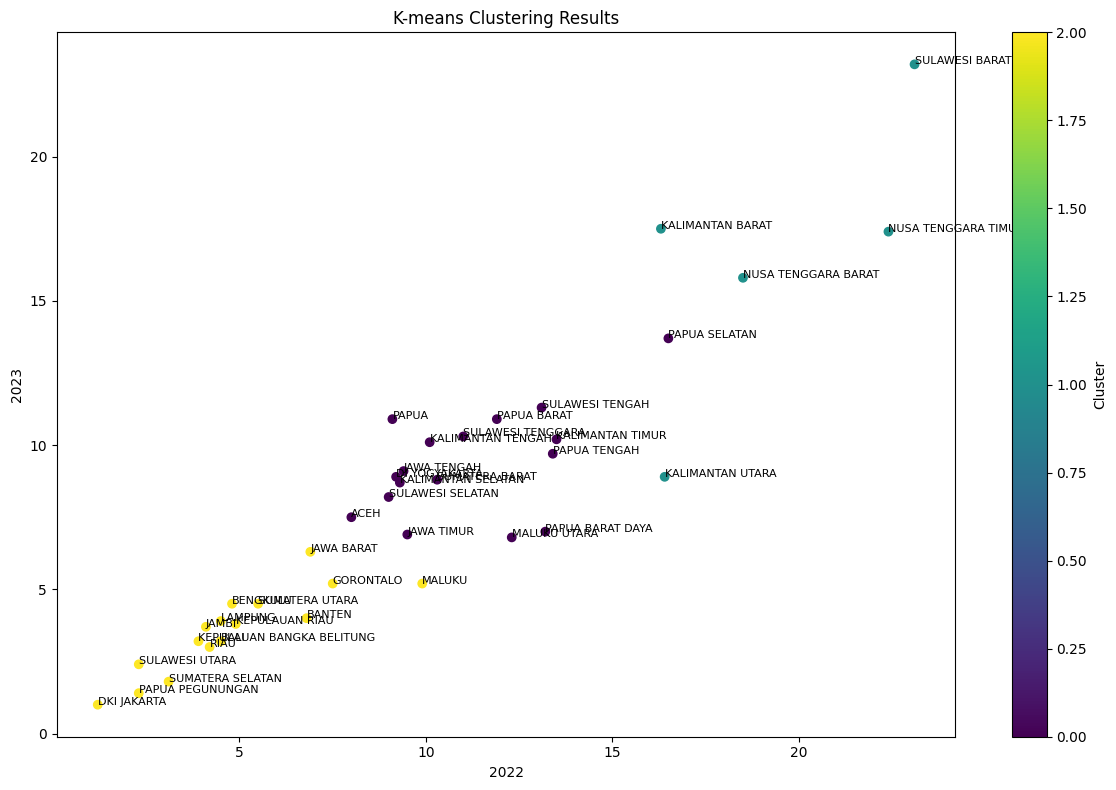

In [49]:
# Visualize the clusters (using first two features)
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X['2022'], X['2023'], c=df['Cluster'], cmap='viridis')
plt.xlabel('2022')
plt.ylabel('2023')
plt.title('K-means Clustering Results')
plt.colorbar(scatter, label='Cluster')

# Annotate with 'Provinsi'
for i, txt in enumerate(df['Provinsi']):
    plt.annotate(txt, (X.iloc[i]['2022'], X.iloc[i]['2023']), fontsize=8)

plt.tight_layout()
plt.show()

### **Kesimpulan**

Dari hasil clustering di atas, dapat dilihat daerah/provinsi mana yang membutuhkan penanggulangan lebih intens

